In [1]:
# In the exerise, use the dataset function from sklearn called make_blobs
# We will implement the basic keras Sequential model

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [4]:
def plot_data(pl, x, y):
    pl.plot(x[y==0, 0], x[y==0, 1], "ob", alpha=0.5)
    pl.plot(x[y==1, 0], x[y==1, 1], "xr", alpha=0.5)
    pl.legend(['0', '1'])
    return pl

In [37]:
def plot_decision_boundary(model, x, y):

    amin, bmin = x.min(axis = 0) - 0.1
    amax, bmax = x.max(axis = 0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    
    plot_data(plt, x, y)

    return plt   

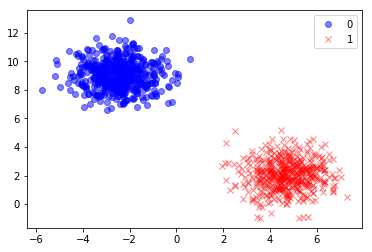

In [38]:
x, y = make_blobs(n_samples=1000, centers = 2, random_state=42)

pl = plot_data(plt, x, y)
pl.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [17]:
model = Sequential()
model.add(Dense(1,input_shape=(2,), activation = "sigmoid"))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
700/700 [==============================] - 0s 251us/step - loss: 1.5112 - acc: 0.5443
Epoch 2/100
700/700 [==============================] - 0s 28us/step - loss: 0.1016 - acc: 0.9986
Epoch 3/100
700/700 [==============================] - 0s 34us/step - loss: 0.0233 - acc: 1.0000
Epoch 4/100
700/700 [==============================] - 0s 31us/step - loss: 0.0161 - acc: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 34us/step - loss: 0.0131 - acc: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 31us/step - loss: 0.0111 - acc: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 36us/step - loss: 0.0095 - acc: 1.0000
Epoch 8/100
700/700 [==============================] - 0s 30us/step - loss: 0.0083 - acc: 1.0000
Epoch 9/100
700/700 [==============================] - 0s 38us/step - loss: 0.0073 - acc: 1.0000
Epoch 10/100
700/700 [==============================] - 0s 26us/step - loss: 0.0066 - acc: 1.0000
Epoch 11/100
700/700 [======

700/700 [==============================] - 0s 23us/step - loss: 4.6801e-04 - acc: 1.0000
Epoch 84/100
700/700 [==============================] - 0s 23us/step - loss: 4.6123e-04 - acc: 1.0000
Epoch 85/100
700/700 [==============================] - 0s 23us/step - loss: 4.5249e-04 - acc: 1.0000
Epoch 86/100
700/700 [==============================] - 0s 21us/step - loss: 4.4475e-04 - acc: 1.0000
Epoch 87/100
700/700 [==============================] - 0s 24us/step - loss: 4.3746e-04 - acc: 1.0000
Epoch 88/100
700/700 [==============================] - 0s 23us/step - loss: 4.3167e-04 - acc: 1.0000
Epoch 89/100
700/700 [==============================] - 0s 23us/step - loss: 4.2171e-04 - acc: 1.0000
Epoch 90/100
700/700 [==============================] - 0s 23us/step - loss: 4.1796e-04 - acc: 1.0000
Epoch 91/100
700/700 [==============================] - 0s 21us/step - loss: 4.0998e-04 - acc: 1.0000
Epoch 92/100
700/700 [==============================] - 0s 21us/step - loss: 4.0737e-04 - acc: 

300/300 [==============================] - 0s 126us/step


Test loss: 0.00011760922488368427 Test accuracy: 1.0


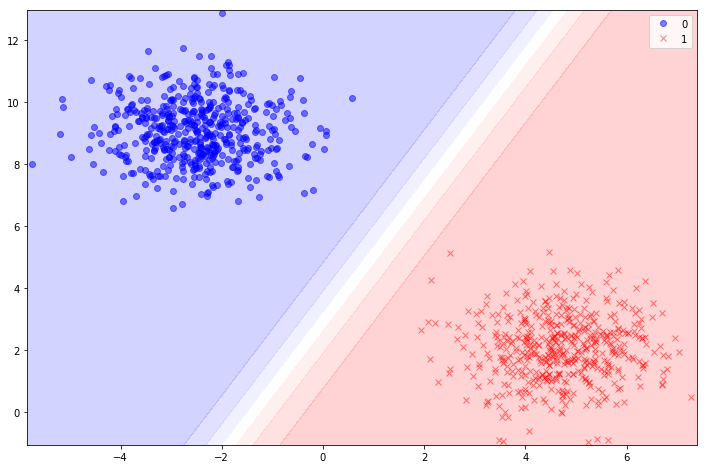

In [18]:
eval_result = model.evaluate(x_test, y_test)
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, x, y).show()

In [19]:
test_x  =np.random.randn(10,2)
test_x

array([[-0.61466372,  0.66375623],
       [ 0.13660605,  0.67416316],
       [-0.20231452,  0.13429472],
       [ 0.60299385,  0.00619641],
       [-1.67399434, -0.89997394],
       [ 0.77487898, -0.56015768],
       [ 1.55574286,  2.64034335],
       [-0.19674455, -1.81799008],
       [-0.81727191,  1.05623639],
       [-0.84670634, -1.52264193]])

In [20]:
amin, bmin = test_x.min(axis=0)
amax, bmax = test_x.max(axis=0)

In [21]:
print(amin)
print(bmin)
print(amax)
print(bmax)

-1.6739943387644451
-1.8179900844247538
1.5557428631136532
2.6403433549117152


In [22]:
hticks = np.linspace(amin, amax, 10)
vticks = np.linspace(bmin, bmax, 10)

In [23]:
hticks

array([-1.67399434, -1.31513465, -0.95627496, -0.59741527, -0.23855558,
        0.12030411,  0.4791638 ,  0.83802348,  1.19688317,  1.55574286])

In [24]:
vticks

array([-1.81799008, -1.3226197 , -0.82724932, -0.33187894,  0.16349144,
        0.65886183,  1.15423221,  1.64960259,  2.14497297,  2.64034335])

In [25]:
aa, bb = np.meshgrid(hticks, vticks, sparse = True)

In [26]:
aa

array([[-1.67399434, -1.31513465, -0.95627496, -0.59741527, -0.23855558,
         0.12030411,  0.4791638 ,  0.83802348,  1.19688317,  1.55574286]])

In [27]:
bb

array([[-1.81799008],
       [-1.3226197 ],
       [-0.82724932],
       [-0.33187894],
       [ 0.16349144],
       [ 0.65886183],
       [ 1.15423221],
       [ 1.64960259],
       [ 2.14497297],
       [ 2.64034335]])

In [28]:
aa.ravel()

array([-1.67399434, -1.31513465, -0.95627496, -0.59741527, -0.23855558,
        0.12030411,  0.4791638 ,  0.83802348,  1.19688317,  1.55574286])

In [29]:
bb.ravel()

array([-1.81799008, -1.3226197 , -0.82724932, -0.33187894,  0.16349144,
        0.65886183,  1.15423221,  1.64960259,  2.14497297,  2.64034335])

In [30]:
ab = np.c_[aa.ravel(), bb.ravel()]

In [31]:
ab

array([[-1.67399434, -1.81799008],
       [-1.31513465, -1.3226197 ],
       [-0.95627496, -0.82724932],
       [-0.59741527, -0.33187894],
       [-0.23855558,  0.16349144],
       [ 0.12030411,  0.65886183],
       [ 0.4791638 ,  1.15423221],
       [ 0.83802348,  1.64960259],
       [ 1.19688317,  2.14497297],
       [ 1.55574286,  2.64034335]])

In [32]:
c = model.predict(ab)

In [33]:
c

array([[0.77048886],
       [0.8139705 ],
       [0.8508094 ],
       [0.8814161 ],
       [0.9064342 ],
       [0.9266136 ],
       [0.94271606],
       [0.95545506],
       [0.9654649 ],
       [0.97328824]], dtype=float32)

In [34]:
c.reshape(aa.shape)

array([[0.77048886, 0.8139705 , 0.8508094 , 0.8814161 , 0.9064342 ,
        0.9266136 , 0.94271606, 0.95545506, 0.9654649 , 0.97328824]],
      dtype=float32)

In [35]:
print(aa.shape)

(1, 10)


In [36]:
aa

array([[-1.67399434, -1.31513465, -0.95627496, -0.59741527, -0.23855558,
         0.12030411,  0.4791638 ,  0.83802348,  1.19688317,  1.55574286]])